In [6]:
%matplotlib inline

import moabb
from moabb.datasets import BNCI2014001, Weibo2014, Zhou2016
from moabb.paradigms import LeftRightImagery
from moabb.evaluations import WithinSessionEvaluation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

from mne.decoding import CSP
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.classification import MDM

import matplotlib.pyplot as plt
import seaborn as sns

import mne
mne.set_log_level("CRITICAL")

moabb.set_log_level('info')
import warnings
warnings.filterwarnings("ignore")

In [7]:
datasets = [BNCI2014001(), Weibo2014(), Zhou2016()]

paradigm = LeftRightImagery()

evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets, overwrite=True)

pipelines = {}
pipelines['csp+lda'] = make_pipeline(CSP(n_components=8), LDA())

parameters = {'C': np.logspace(-2, 2, 10)}
clf = GridSearchCV(SVC(kernel='linear'), parameters)
pipelines['tgsp+svm'] = make_pipeline(Covariances('oas'), TangentSpace(metric='riemann'), clf)

clf = MDM(metric='riemann')
pipelines['MDM'] = make_pipeline(Covariances('oas'), clf)

results = evaluation.process(pipelines) 

2019-08-22 14:59:53 desktop-270 root[18867] INFO Processing dataset: 001-2014
2019-08-22 15:00:01 desktop-270 root[18867] INFO csp+lda | 001-2014 | 1 | session_E: Score 0.940
2019-08-22 15:00:03 desktop-270 root[18867] INFO tgsp+svm | 001-2014 | 1 | session_E: Score 0.967
2019-08-22 15:00:04 desktop-270 root[18867] INFO MDM | 001-2014 | 1 | session_E: Score 0.941
2019-08-22 15:00:05 desktop-270 root[18867] INFO csp+lda | 001-2014 | 1 | session_T: Score 0.934
2019-08-22 15:00:07 desktop-270 root[18867] INFO tgsp+svm | 001-2014 | 1 | session_T: Score 0.950
2019-08-22 15:00:08 desktop-270 root[18867] INFO MDM | 001-2014 | 1 | session_T: Score 0.945
2019-08-22 15:00:15 desktop-270 root[18867] INFO csp+lda | 001-2014 | 2 | session_E: Score 0.691
2019-08-22 15:00:17 desktop-270 root[18867] INFO tgsp+svm | 001-2014 | 2 | session_E: Score 0.653
2019-08-22 15:00:18 desktop-270 root[18867] INFO MDM | 001-2014 | 2 | session_E: Score 0.530
2019-08-22 15:00:19 desktop-270 root[18867] INFO csp+lda |

Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:02:49 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:02:55 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 1 | session_0: Score 0.832
2019-08-22 15:03:07 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 1 | session_0: Score 0.810
2019-08-22 15:03:13 desktop-270 root[18867] INFO MDM | Weibo 2014 | 1 | session_0: Score 0.519


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:03:23 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:03:29 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 2 | session_0: Score 0.938
2019-08-22 15:03:39 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 2 | session_0: Score 0.982
2019-08-22 15:03:44 desktop-270 root[18867] INFO MDM | Weibo 2014 | 2 | session_0: Score 0.605


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:03:55 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:04:01 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 3 | session_0: Score 0.504
2019-08-22 15:04:12 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 3 | session_0: Score 0.482
2019-08-22 15:04:17 desktop-270 root[18867] INFO MDM | Weibo 2014 | 3 | session_0: Score 0.466


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:04:28 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:04:35 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 4 | session_0: Score 0.559
2019-08-22 15:04:46 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 4 | session_0: Score 0.631
2019-08-22 15:04:51 desktop-270 root[18867] INFO MDM | Weibo 2014 | 4 | session_0: Score 0.519


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:05:03 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:05:09 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 5 | session_0: Score 0.825
2019-08-22 15:05:20 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 5 | session_0: Score 0.803
2019-08-22 15:05:26 desktop-270 root[18867] INFO MDM | Weibo 2014 | 5 | session_0: Score 0.474


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:05:36 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:05:42 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 6 | session_0: Score 0.974
2019-08-22 15:05:50 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 6 | session_0: Score 0.974
2019-08-22 15:05:55 desktop-270 root[18867] INFO MDM | Weibo 2014 | 6 | session_0: Score 0.731


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:06:05 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:06:12 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 7 | session_0: Score 0.967
2019-08-22 15:06:22 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 7 | session_0: Score 0.963
2019-08-22 15:06:28 desktop-270 root[18867] INFO MDM | Weibo 2014 | 7 | session_0: Score 0.923


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:06:39 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:06:45 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 8 | session_0: Score 0.997
2019-08-22 15:07:00 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 8 | session_0: Score 0.929
2019-08-22 15:07:15 desktop-270 root[18867] INFO MDM | Weibo 2014 | 8 | session_0: Score 0.527


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:07:26 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:07:32 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 9 | session_0: Score 0.813
2019-08-22 15:07:43 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 9 | session_0: Score 0.887
2019-08-22 15:07:48 desktop-270 root[18867] INFO MDM | Weibo 2014 | 9 | session_0: Score 0.633


Setting non-standard config type: "MNE_DATASETS_WEIBO2014_PATH"


2019-08-22 15:07:58 desktop-270 root[18867] WARNING Trial data de-meaned and concatenated with a buffer to create cont data
2019-08-22 15:08:05 desktop-270 root[18867] INFO csp+lda | Weibo 2014 | 10 | session_0: Score 0.731
2019-08-22 15:08:15 desktop-270 root[18867] INFO tgsp+svm | Weibo 2014 | 10 | session_0: Score 0.702
2019-08-22 15:08:20 desktop-270 root[18867] INFO MDM | Weibo 2014 | 10 | session_0: Score 0.660
2019-08-22 15:08:20 desktop-270 root[18867] INFO Processing dataset: Zhou 2016


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-08-22 15:08:26 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 1 | session_0: Score 0.866
2019-08-22 15:08:27 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 1 | session_0: Score 0.846
2019-08-22 15:08:28 desktop-270 root[18867] INFO MDM | Zhou 2016 | 1 | session_0: Score 0.737
2019-08-22 15:08:29 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 1 | session_1: Score 0.888
2019-08-22 15:08:30 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 1 | session_1: Score 0.870
2019-08-22 15:08:31 desktop-270 root[18867] INFO MDM | Zhou 2016 | 1 | session_1: Score 0.878
2019-08-22 15:08:31 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 1 | session_2: Score 0.962
2019-08-22 15:08:32 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 1 | session_2: Score 0.976
2019-08-22 15:08:33 desktop-270 root[18867] INFO MDM | Zhou 2016 | 1 | session_2: Score 0.944


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-08-22 15:08:38 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 2 | session_0: Score 0.842
2019-08-22 15:08:39 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 2 | session_0: Score 0.912
2019-08-22 15:08:40 desktop-270 root[18867] INFO MDM | Zhou 2016 | 2 | session_0: Score 0.872
2019-08-22 15:08:40 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 2 | session_1: Score 0.706
2019-08-22 15:08:41 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 2 | session_1: Score 0.738
2019-08-22 15:08:42 desktop-270 root[18867] INFO MDM | Zhou 2016 | 2 | session_1: Score 0.696
2019-08-22 15:08:42 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 2 | session_2: Score 0.880
2019-08-22 15:08:43 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 2 | session_2: Score 0.898
2019-08-22 15:08:44 desktop-270 root[18867] INFO MDM | Zhou 2016 | 2 | session_2: Score 0.850


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-08-22 15:08:49 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 3 | session_0: Score 0.970
2019-08-22 15:08:50 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 3 | session_0: Score 0.978
2019-08-22 15:08:51 desktop-270 root[18867] INFO MDM | Zhou 2016 | 3 | session_0: Score 0.958
2019-08-22 15:08:51 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 3 | session_1: Score 0.968
2019-08-22 15:08:52 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 3 | session_1: Score 0.946
2019-08-22 15:08:53 desktop-270 root[18867] INFO MDM | Zhou 2016 | 3 | session_1: Score 0.822
2019-08-22 15:08:53 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 3 | session_2: Score 0.984
2019-08-22 15:08:54 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 3 | session_2: Score 0.986
2019-08-22 15:08:55 desktop-270 root[18867] INFO MDM | Zhou 2016 | 3 | session_2: Score 0.904


Setting non-standard config type: "MNE_DATASETS_ZHOU2016_PATH"
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. Defaulting to 2.
The following EEG sensors did not have a position specified in the selected montage: ['VEOU', 'VEOL']. Their position has been left untouched.
  Could not parse meas date from the header. Setting to None.
Could not define the number of bytes automatically. D

2019-08-22 15:08:59 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 4 | session_0: Score 0.960
2019-08-22 15:09:00 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 4 | session_0: Score 0.951
2019-08-22 15:09:01 desktop-270 root[18867] INFO MDM | Zhou 2016 | 4 | session_0: Score 0.973
2019-08-22 15:09:01 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 4 | session_1: Score 0.970
2019-08-22 15:09:03 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 4 | session_1: Score 0.972
2019-08-22 15:09:04 desktop-270 root[18867] INFO MDM | Zhou 2016 | 4 | session_1: Score 0.962
2019-08-22 15:09:04 desktop-270 root[18867] INFO csp+lda | Zhou 2016 | 4 | session_2: Score 0.928
2019-08-22 15:09:05 desktop-270 root[18867] INFO tgsp+svm | Zhou 2016 | 4 | session_2: Score 0.974
2019-08-22 15:09:06 desktop-270 root[18867] INFO MDM | Zhou 2016 | 4 | session_2: Score 0.972


In [8]:
results

,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.939728,0.125495,144.0,1,session_E,22,2,001-2014,csp+lda
1,0.934458,0.101597,144.0,1,session_T,22,2,001-2014,csp+lda
2,0.690594,0.110923,144.0,2,session_E,22,2,001-2014,csp+lda
3,0.639642,0.102301,144.0,2,session_T,22,2,001-2014,csp+lda
4,0.994667,0.106696,144.0,3,session_E,22,2,001-2014,csp+lda
5,0.993878,0.100394,144.0,3,session_T,22,2,001-2014,csp+lda
6,0.812857,0.124216,144.0,4,session_E,22,2,001-2014,csp+lda
7,0.796200,0.101823,144.0,4,session_T,22,2,001-2014,csp+lda
8,0.587333,0.112364,144.0,5,session_E,22,2,001-2014,csp+lda
9,0.549669,0.104174,144.0,5,session_T,22,2,001-2014,csp+lda


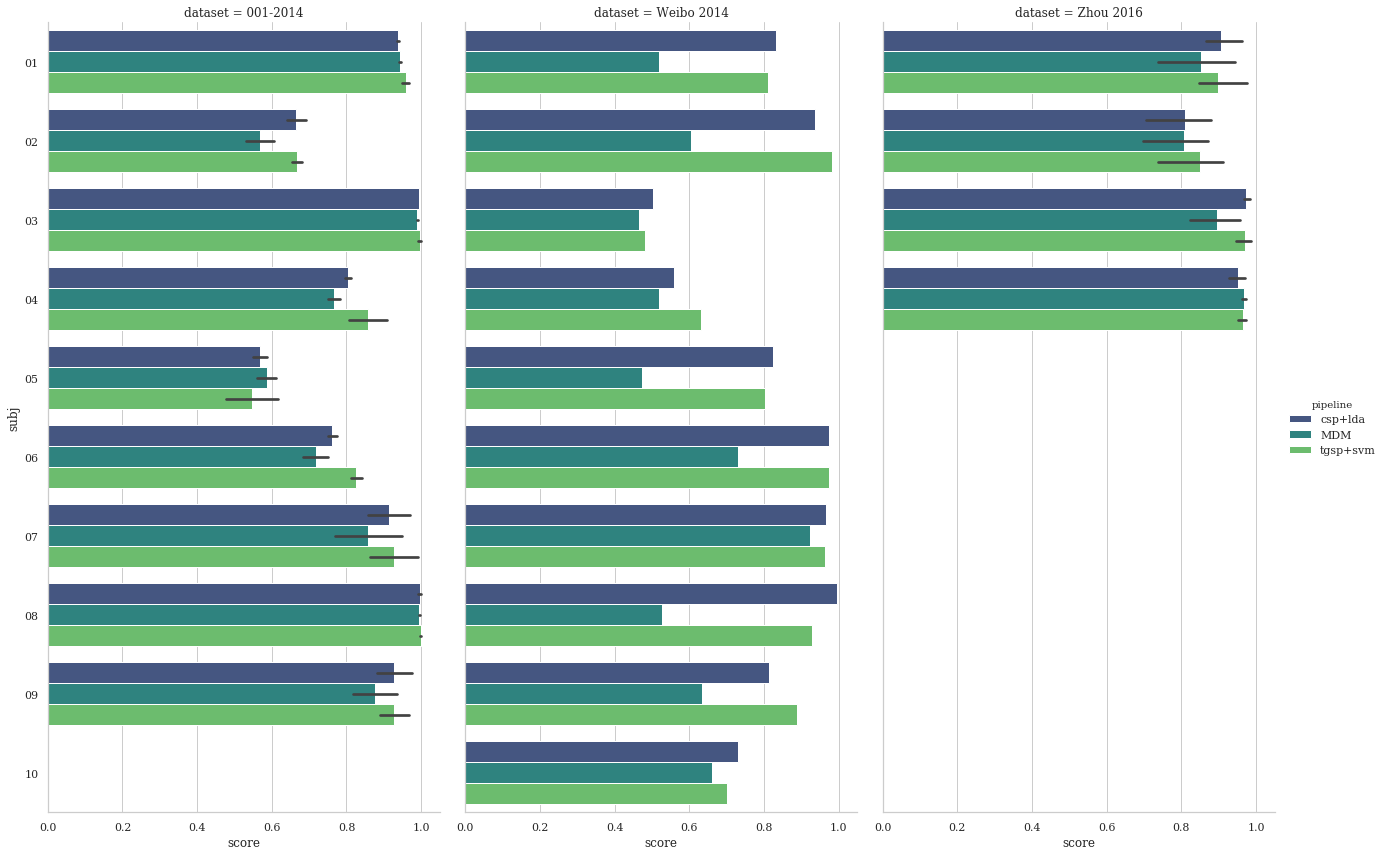

In [21]:
results["subj"] = [str(resi).zfill(2) for resi in results["subject"]]
g = sns.catplot(kind='bar', x="score", y="subj", hue="pipeline", col="dataset", height=12, aspect=0.5, data=results, orient='h', palette='viridis')

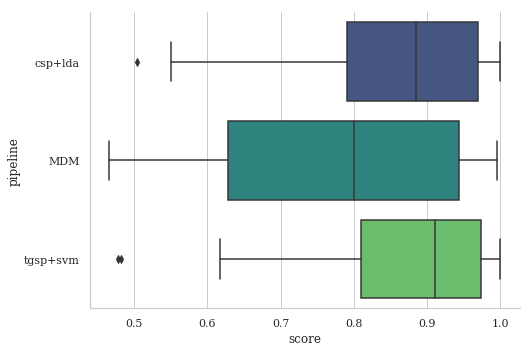

In [36]:
g = sns.catplot(kind="box", x="score", y="pipeline", aspect=1.5, data=results, orient='h', palette='viridis')